### Question 1: Compare Linear regression, Polynomial regression and local regression (40)

The AirQualityUCI data set contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your dataset file.
AirQualityUCI = pd.read_csv('AirQualityUCI.csv')
print(AirQualityUCI)

      Unnamed: 0     Date      Time  HourlyCO  PT08_S1   NMHC  Benzene  \
0              1  3/10/04  18:00:00       2.6   1360.0  150.0     11.9   
1              2  3/10/04  19:00:00       2.0   1292.0  112.0      9.4   
2              3  3/10/04  20:00:00       2.2   1402.0   88.0      9.0   
3              4  3/10/04  21:00:00       2.2   1376.0   80.0      9.2   
4              5  3/10/04  22:00:00       1.6   1272.0   51.0      6.5   
...          ...      ...       ...       ...      ...    ...      ...   
9466        9467      NaN       NaN       NaN      NaN    NaN      NaN   
9467        9468      NaN       NaN       NaN      NaN    NaN      NaN   
9468        9469      NaN       NaN       NaN      NaN    NaN      NaN   
9469        9470      NaN       NaN       NaN      NaN    NaN      NaN   
9470        9471      NaN       NaN       NaN      NaN    NaN      NaN   

      PT08_S2    NOx  PT08_S3    NO2  PT08_S4  PT08_S5  Temp  RelHumidity  \
0      1046.0  166.0   1056.0  113

1. Remove all the missing values and the first two columns from the data. How many rows and columns we have in the end? Split the data into training(80%) and testing(20%) data.

In [2]:
AirQualityUCI = AirQualityUCI.drop(['Unnamed: 0', 'Date', 'Time'], axis=1)

In [3]:
AirQualityUCI.dropna(inplace=True, how='all', axis=1)
AirQualityUCI.dropna(inplace=True, how='any', axis=0)

df_dims = AirQualityUCI.shape
print(f"The clean df has {df_dims[0]} rows and {df_dims[1]} columns.")

The clean df has 827 rows and 13 columns.


In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = AirQualityUCI.drop('HourlyCO', axis=1)
y = AirQualityUCI['HourlyCO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. Suppose we are interested in predicting the HourlyCO in the data, using all the other variables. Fit a linear regression model and report the MSE. 

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_linear = lm.predict(X_test)
MSE_linear = mean_squared_error(y_test, y_linear)
print(MSE_linear)

0.055937432453760434


3. Now let's fit a another model, still use all variables but fit a polynomial regression model with degree 2. Report the MSE.  

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

deg = 2
poly_features = PolynomialFeatures(degree=deg)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_fit = poly_model.predict(X_poly_test)

MSE_squared = mean_squared_error(y_test, y_poly_fit)
print(MSE_squared)

0.04476404430347004


4. Keep increasing the degree to 3. How does the MSE change and can you explain why?

In [7]:
deg = 3
poly_features = PolynomialFeatures(degree=deg)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_fit = poly_model.predict(X_poly_test)

MSE_cubic = mean_squared_error(y_test, y_poly_fit)
print(MSE_cubic)
print("Why does the MSE change?")

1.0074419817667135
Why does the MSE change?


The MSE decreases slightly when fitting with a quadratic regression model as opposed to a linear model. This is not surprising since as you increase the polynomial degree, your curve has more freedom to better fit your data. However, one thing to keep in mind is that if your curve degree is too high, you could be overfitting your data. This is what we observe when we try to fit a cubic regression model since the MSE increases when compared to the quadratic model. In fact, the cubic MSE is higher than the one from the original linear model, indicating that a cubic polynomial is not a good model for this data.

### Question 2: Compare Regularization methods (45)

1. We notice that we may not want to use all the features in the dataset and it seems that some features are not independent with each other. Therefore, we want to apply the regularization methods. What are the three regularization methods we have discussed in the lecture and briefly state their differences. (5)

In class we talked about three regularization methods: Lasso, Ridge, and Elastic Net Regression.
All three of these methods add a penalty term to the Linear Regression's RSS in order to estimate the most relevant regression coefficients. For Lasso, this penalty term is the sum of the absolute value of the coefficients, and after using Lasso some of your coefficients can be zero.
For Ridge, the penalty term is the sum of the squared coefficients, and after applying Ridge no coeeficient can be zero.
Elastic Net Regression is a mix of both Lasso and Ridge, the penalty term is the sum of the sums of both the absolute values of the coeffs. and the squared coeffs. For this method, a new hyperparameter is introduced to measure if you assign more weight to lasso part or the ridge part of your regression.

2. What is the pre-processing steps that required to perform regularization and why? Perform this pre-processing steps. (5)

Regularization methods are sensitive to the scale of the data since the magnitude of the estimated coefficients depends on the units of the input variable. Hence, we pre-process the data by transforming the input variables to be on the same scale.
One way of doing this is by using the StandardScaler() method from sklearn which standardizes features by removing the mean and scaling to unit variance.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

3. Fit Lasso model with the best tuning parameter. Report MSE. Print the table for the coefficients. Hint, you can use the list of alpha we show in the lecture, if your best alpha is at the boundary, it is OK, no need to keep increaing the range. (10)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Tuning alpha for Lasso
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

# perform gridsearch
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"The tuned alpha value is {best_alpha}")

The tuned alpha value is 0.001


In [10]:
# Optimized Lasso
alpha = best_alpha

lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

MSE_Lasso = mean_squared_error(y_test, y_pred_lasso)
print(MSE_Lasso)

0.05741732286271508


In [11]:
lasso_coef_df = pd.DataFrame(X.columns)
lasso_coef_df.columns = ['Features']
lasso_coef_df['Coefficient Estimates'] = pd.Series(lasso_model.coef_)
print(lasso_coef_df)

       Features  Coefficient Estimates
0       PT08_S1               0.276946
1          NMHC               0.197298
2       Benzene               0.803607
3       PT08_S2              -0.000000
4           NOx               0.373325
5       PT08_S3               0.041853
6           NO2               0.129093
7       PT08_S4              -0.105926
8       PT08_S5              -0.190078
9          Temp              -0.176570
10  RelHumidity              -0.097024
11  AbsHumidity               0.101180


4. Fit Ridge model with the best tuning parameter. Report MSE. Print the table for the coefficients. (10)

In [12]:
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

# perform gridsearch
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"The tuned alpha value is {best_alpha}")

The tuned alpha value is 0.01


In [13]:
# Optimized Ridge
alpha = best_alpha

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

MSE_Ridge = mean_squared_error(y_test, y_pred_ridge)
print(MSE_Ridge)

0.054984287465528484


In [14]:
ridge_coef_df = pd.DataFrame(X.columns)
ridge_coef_df.columns = ['Features']
ridge_coef_df['Coefficient Estimates'] = pd.Series(ridge_model.coef_)
print(ridge_coef_df)

       Features  Coefficient Estimates
0       PT08_S1               0.310530
1          NMHC               0.181554
2       Benzene               1.008009
3       PT08_S2              -0.167206
4           NOx               0.385260
5       PT08_S3              -0.005623
6           NO2               0.142084
7       PT08_S4              -0.205608
8       PT08_S5              -0.219892
9          Temp              -0.232035
10  RelHumidity              -0.156241
11  AbsHumidity               0.155999


5. Fit Elastic net model with the best tuning parameter. Report MSE. Print the table for the coefficients. 

Hint: even though we did not include this in the lecture, you can image it is pretty similar to the Lasso and ridge. The function is called ElasticNet and notice that there are two parameters to tune: 'alpha' and 'l1_ratio'. You can use grid_search.best_params_['alpha'] to extract the best parameter for alpha. (15)

In [1]:
from sklearn.linear_model import ElasticNet

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
# l1_ratios = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

# perform gridsearch
elastic_model = ElasticNet()
grid_search = GridSearchCV(elastic_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
# best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"The tuned alpha is {best_alpha}")
# print(f"The tuned l1_ratio is {best_l1_ratio}")

NameError: name 'GridSearchCV' is not defined

In [17]:
elastic_coef_df = pd.DataFrame(X.columns)
elastic_coef_df.columns = ['Features']
elastic_coef_df['Coefficient Estimates'] = pd.Series(elastic_model.coef_)
print(elastic_coef_df)

       Features  Coefficient Estimates
0       PT08_S1               0.285195
1          NMHC               0.195982
2       Benzene               0.833724
3       PT08_S2              -0.010101
4           NOx               0.379453
5       PT08_S3               0.039568
6           NO2               0.132074
7       PT08_S4              -0.138076
8       PT08_S5              -0.198890
9          Temp              -0.203353
10  RelHumidity              -0.126086
11  AbsHumidity               0.127234


### Question 3: Implement Gradient Descent for Ridge (15)

Try to modify your earlier implementation for the linear regression gradient descent, so that now it is the gradient descent for ridge. Apply the Air quality data to make sure it works. 

Hint: The only thing you want to change is the gradient and cost function, which will now have an extra term. You can set the tuning parameter alpha as 0.01. 

In [18]:
def ridge_cost(X_b, y, thetas, lambda_):
    """Cost for Ridge regression
       Params: X_b data (with 1st col of one's), true target values y, 
               coefficient array (thetas), and weight of ridge penalization (lambda_)
       Returns: cost = RSS + lambda * sum(squared coefficients)
       Descr: compute RSS (sum of (predictions - y) ** 2) and add to 
              ridge penalization, return summand
    """
    n = len(y)
    predictions = np.dot(X_b, thetas)
    errors = predictions - y
    
    regularization_term = lambda_ *  np.sum(np.square(thetas[1:]))
    linear_reg_term = np.sum(np.square(errors))
    cost = linear_reg_term + regularization_term
    
    return cost

def ridge_gradient_descent(X_b, y, thetas, learning_rate, num_iterations, lambda_):
    """ Compute Ridge Gradient Descent for a finite number of iterations
        Params: X_b data (with 1st col of one's), true target values y, 
               coefficient array (thetas), learning rate to update thetas
               on each iteration, # of iterations, and weight of ridge penalization (lambda_)
        Returns: optimal theta array and cost_history
        Descr: compute current predictions, errors and gradients for the given data;
               update theta array from current gradient and save cost;
               repeat these steps for the number of iterations provided
    """
    n = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        # X_b * theta
        predictions = np.dot(X_b, thetas)
        
        # Current error
        errors =  predictions - y
        
        # Optimal solutions for each coefficient 
        gradients = ((2 / n) * np.dot(X_b.T, errors)) + (2 * lambda_ * thetas)
        
        # Update coefficients
        thetas -= learning_rate * gradients
        #print("thetas: ",thetas)
        
        # Conpute and keep track of costs
        cost = ridge_cost(X_b, y, thetas, lambda_)
        cost_history.append(cost)
  
    return thetas, cost_history

In [19]:
thetas = np.array([0] * 12, dtype='float')

In [20]:
optimal_thetas, cost_history = ridge_gradient_descent(X_train_scaled, y_train, thetas, 0.01, 1000, 0.01)
optimal_thetas = [round(i, 3) for i in thetas]
print(optimal_thetas)

[0.236, 0.267, 0.357, 0.185, 0.339, 0.115, 0.126, 0.167, -0.104, -0.085, -0.016, -0.012]


In [21]:
print(ridge_coef_df)

       Features  Coefficient Estimates
0       PT08_S1               0.310530
1          NMHC               0.181554
2       Benzene               1.008009
3       PT08_S2              -0.167206
4           NOx               0.385260
5       PT08_S3              -0.005623
6           NO2               0.142084
7       PT08_S4              -0.205608
8       PT08_S5              -0.219892
9          Temp              -0.232035
10  RelHumidity              -0.156241
11  AbsHumidity               0.155999


3690.2946004956016


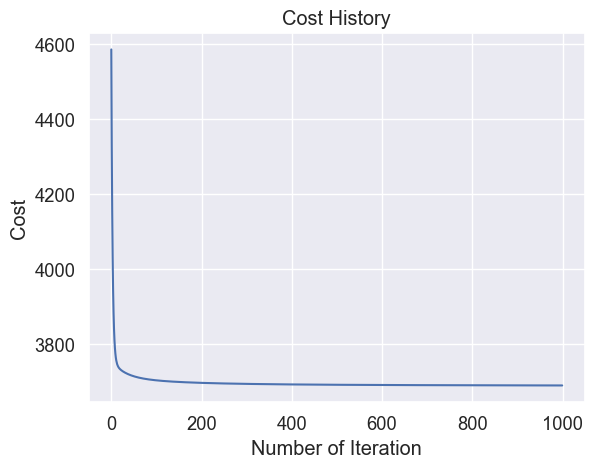

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print(cost_history[-1])

sns.set(font_scale=1.2)
plt.plot(cost_history)
plt.title('Cost History')
plt.ylabel('Cost')
plt.xlabel('Number of Iteration')
plt.show()